<a href="https://colab.research.google.com/github/x7rishi/Boston_housing_ML/blob/master/linearRegression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib as npl 
import matplotlib.pyplot as plt


from matplotlib.animation import FuncAnimation as Fa 
from matplotlib.animation import writers
from sklearn.datasets import load_boston 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML
from pprint import pprint


In [54]:
boston = load_boston() 
features = pd.DataFrame(boston.data, columns = boston.feature_names)
print(features)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]


In [55]:
target = pd.DataFrame(boston.target, columns = ['target'])

In [56]:
print(features)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]


In [57]:
df = pd.concat([features,target],axis = 1)
df 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


[(0.7376627261740143, 'LSTAT'),
 (0.6953599470715389, 'RM'),
 (0.507786685537561, 'PTRATIO'),
 (0.483725160028373, 'INDUS'),
 (0.46853593356776646, 'TAX'),
 (0.4273207723732817, 'NOX'),
 (0.3883046085868114, 'CRIM'),
 (0.3816262306397776, 'RAD'),
 (0.3769545650045959, 'AGE'),
 (0.3604453424505447, 'ZN'),
 (0.33346081965706653, 'B'),
 (0.24992873408590394, 'DIS'),
 (0.1752601771902975, 'CHAS')]


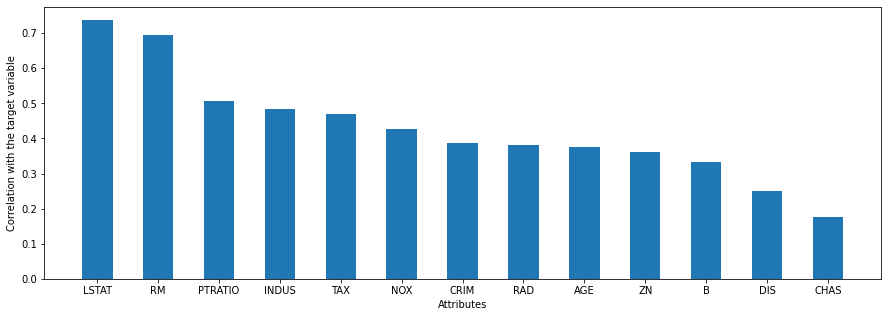

In [58]:
corr = df.corr('pearson')
corrs = [abs(corr[attr]['target']) for attr in list(features)]
l = list(zip(corrs,list(features)))
l.sort(key= lambda x: x[0],reverse = True)
pprint(l)
corrs,labels = list(zip((*l)))

index = np.arange(len(labels))

plt.figure(figsize = (15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index,labels)
plt.show() 

In [59]:
X = df['LSTAT'].values
Y = df['target'].values

In [60]:
x_scaler = MinMaxScaler() 
y_scaler = MinMaxScaler() 


X = x_scaler.fit_transform(X.reshape(-1,1))
pprint(X[:5])
X=X[:,-1]
pprint(X[:4])

Y = y_scaler.fit_transform(Y.reshape(-1,1))

Y = Y[:,-1]
print(len(Y))

array([[0.08967991],
       [0.2044702 ],
       [0.06346578],
       [0.03338852],
       [0.09933775]])
array([0.08967991, 0.2044702 , 0.06346578, 0.03338852])
506


In [61]:
def error(m,x,c,t) : 
  N = x.size
  e = sum(((m*x+c)-t)**2)
  return(e/(2*N))

In [62]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)
print(len(xtrain))
print(len(xtest))

404
102


In [63]:
def update(m,x,c,t,learning_rate) : 
  grad_m = sum(2*((m*x+c)-t)*x)
  grad_c = sum(2*((m*x+c)-t))
  m = m - grad_m*learning_rate
  c = c- grad_c*learning_rate
  return m,c

In [64]:
e2 = error(0.8,xtrain,0,ytrain)
print(e2)

0.06822856543486609


In [65]:
def grad_descent(init_m, init_c, x,t,learning_rate,iterations,error_threshold) : 
  m = init_m 
  c = init_c 
  error_values = list() 
  mc_values = list() 
  for i in range(iterations) : 
    e = error(m,x,c,t)
    if e < error_threshold : 
      print("Error < threshold. Stopping gradient Descent")
      break 
    error_values.append(e)
    m,c = update(m,x,c,t,learning_rate) 
    mc_values.append((m,c))
  return m,c,error_values,mc_values 

In [66]:
%%time 
init_m = 0.9
init_c = 0 
learning_rate = 0.001
iterations = 500 
error_threshold = 0.001
m,c,error_values , mc_values = grad_descent(init_m,init_c, xtrain,ytrain,learning_rate,iterations,error_threshold)

CPU times: user 118 ms, sys: 980 µs, total: 118 ms
Wall time: 124 ms


In [67]:
mc_values[0][:2]

(0.8722661687505178, 0.08713357983811626)

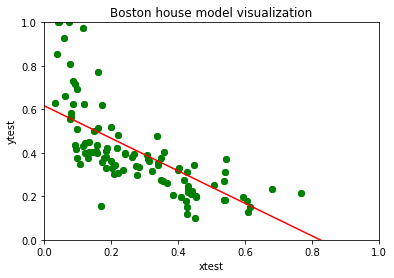

In [68]:
mc_values_anim = mc_values[0:250:5]
fig,ax = plt.subplots()
ln, = plt.plot([],[],'ro-',animated = True)
writer = writers['ffmpeg']
writer = writer(fps=15,metadata = dict(artist='Rishi K.'),bitrate=1000)

def init() : 
  plt.scatter(xtest,ytest,color='g')
  ax.set_xlim(0,1.0)
  ax.set_ylim(0,1.0)
  ax.set_xlabel('xtest')
  ax.set_ylabel('ytest')
  ax.set_title('Boston house model visualization')
  ln.set_data([],[])
  return ln,
def Update(frame) : 
  m,c = mc_values_anim[frame]
  x1,y1 = -0.5, (m*(-0.5))+c
  x2,y2 = 1.5,  (m*1.5)+c
  ln.set_data([x1,x2],[y1,y2])
  return ln, 
def update_frame(frame) : 
  m,c = mc_values_anim[Frame]
  for i in range(len(m)) : 
    x1,y1 = -0.5, (m[i]*(-0.5))+c[i]
    x2,y2 = 1.5,(m[i]*1.5)+c[i]
    ln.set_data([x1,x2],[y1,y2])
    return ln,

anim = Fa(fig,Update,frames = range(len(mc_values_anim)),interval=50,init_func=init,blit=True)
HTML(anim.to_html5_video())



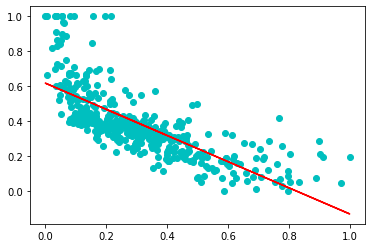

In [69]:
plt.scatter(xtrain,ytrain,color='c')
plt.plot(xtrain,m*xtrain+c,color='r')

Text(0.5, 0, 'Iterations')

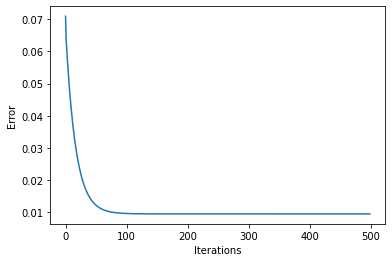

In [70]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

In [71]:
predicted = (m*xtest)+c
mean_squared_error(ytest,predicted)

0.01976419987654067

In [72]:
p = pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target_y','predicted'])
p.head() 

,x,target_y,predicted
0,0.425773,0.148889,0.298083
1,0.081678,0.566667,0.555790
2,0.092439,0.435556,0.547730
3,0.078918,0.806667,0.557857
4,0.060430,0.926667,0.571703


In [73]:
predicted = predicted.reshape(-1,1)
xtest= xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)

predicted_scaled = y_scaler.inverse_transform(predicted)

xtest_scaled = xtest_scaled[:,-1]
ytest_scaled = ytest_scaled[:,-1]
predicted_scaled = predicted_scaled[:,-1]
accur = 100-(abs(predicted_scaled-ytest_scaled)/ytest_scaled)*100
p = pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled,accur)),columns=["x",'target_y',"predicted",'Accuracy'])
p = p.round(decimals = 2)
p.head() 


,x,target_y,predicted,Accuracy
0,17.16,11.7,18.41,42.62
1,4.69,30.5,30.01,98.40
2,5.08,24.6,29.65,79.48
3,4.59,41.3,30.10,72.89
4,3.92,46.7,30.73,65.80


In [74]:
print(sum(accur)/accur.size)

79.15933366758819
